In [283]:
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [284]:
df = pd.read_csv('stroke.csv')


In [285]:
# Pre-processing


In [286]:
# Remove Id Field


In [287]:
df = df.drop("id", axis=1)

In [288]:
# Dropping all rows with Nan Values

In [289]:
df = df.dropna()

In [290]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [291]:
# Changing gender, ever-married, work_type, Residence_type, smoking_status to one hot notation

In [292]:
gender = pd.get_dummies(df['gender'], prefix='gender')
df['gender_Female'] = gender['gender_Female']
df['gender_Male'] = gender['gender_Male']
df['gender_Other'] = gender['gender_Other']
df = df.drop("gender", axis=1)
residence = pd.get_dummies(df['Residence_type'], prefix='Residence_type')
df['Residence_type_Rural'] = residence['Residence_type_Rural']
df['Residence_type_Urban'] = residence['Residence_type_Urban']
df = df.drop("Residence_type", axis=1)
ever_married = pd.get_dummies(df['ever_married'], prefix='ever_married')
df['ever_married_No'] = ever_married['ever_married_No']
df['ever_married_Yes'] = ever_married['ever_married_Yes']
df = df.drop("ever_married", axis=1)
smoking_status = pd.get_dummies(df['smoking_status'], prefix='smoking_status')
df['smoking_status_Unknown'] = smoking_status['smoking_status_Unknown']
df['smoking_status_formerly smoked'] = smoking_status['smoking_status_formerly smoked']
df['smoking_status_never smoked'] = smoking_status['smoking_status_never smoked']
df['smoking_status_smokes'] = smoking_status['smoking_status_smokes']
df = df.drop("smoking_status", axis=1)
work_type = pd.get_dummies(df['work_type'], prefix='work_type')
df['work_type_Govt_job'] = work_type['work_type_Govt_job']
df['work_type_Never_worked'] = work_type['work_type_Never_worked']
df['work_type_Private'] = work_type['work_type_Private']
df['work_type_Self-employed'] = work_type['work_type_Self-employed']
df['work_type_children'] = work_type['work_type_children']
df = df.drop("work_type", axis=1)

In [293]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,Residence_type_Rural,...,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,79.0,1,0,174.12,24.0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [294]:
# Create X and Y dataset

In [295]:

Y_df = df['stroke']
X_df = df
X_df = X_df.drop("stroke", axis=1)

X_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,Residence_type_Rural,Residence_type_Urban,...,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,0


In [296]:
# Dataset is not balanced oversampling minority class
oversample = RandomOverSampler(sampling_strategy=0.30)
X_df, Y_df = oversample.fit_resample(X_df, Y_df)
Y_df.value_counts()

0    4700
1    1410
Name: stroke, dtype: int64

In [297]:
# Make train_test_split - ALL FEATURES
(X_train, X_test, y_train, y_test) = train_test_split(X_df, Y_df, test_size=0.20)

In [298]:
# Train Logistic Regression Model -- ALL FEATURES
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [299]:
# Predict -- ALL FEATURES
y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)

0.7545008183306056


In [300]:
# AUC Score -- ALL FEATURES
y_pred_proba = lr.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

0.8548150991393747


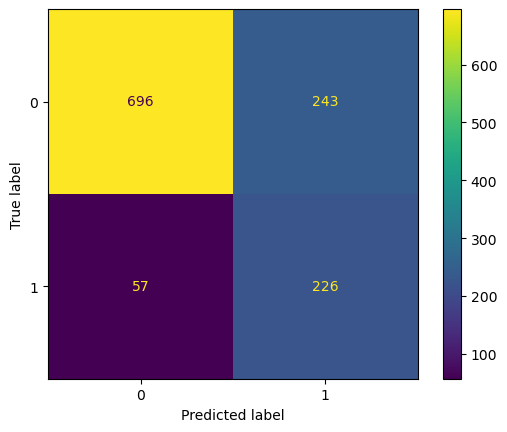

In [301]:
# Confusion Matrix -- ALL FEATURES
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

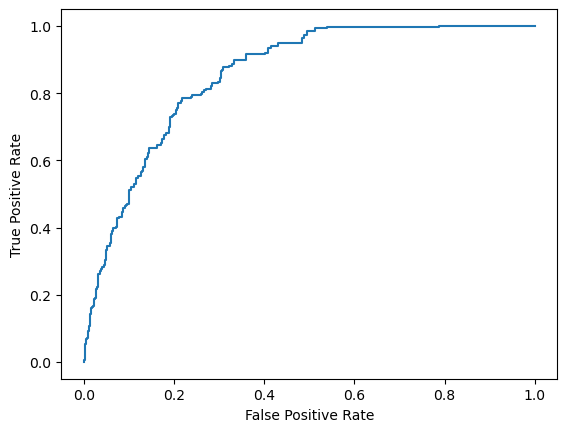

In [302]:
# ROC Curve Plotted -- ALL FEATURES
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [303]:
print(X_df.columns.tolist())

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'gender_Other', 'Residence_type_Rural', 'Residence_type_Urban', 'ever_married_No', 'ever_married_Yes', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']


In [307]:
# Dropping all Lifestyle Features
X_df_nl = df
X_df_nl = X_df_nl.drop("Residence_type_Rural", axis=1)
X_df_nl = X_df_nl.drop("Residence_type_Urban", axis=1)
X_df_nl = X_df_nl.drop("ever_married_No", axis=1)
X_df_nl = X_df_nl.drop("ever_married_Yes", axis=1)
X_df_nl = X_df_nl.drop("smoking_status_Unknown", axis=1)
X_df_nl = X_df_nl.drop("smoking_status_formerly smoked", axis=1)
X_df_nl = X_df_nl.drop("smoking_status_never smoked", axis=1)
X_df_nl = X_df_nl.drop("smoking_status_smokes", axis=1)
X_df_nl = X_df_nl.drop("work_type_Govt_job", axis=1)
X_df_nl = X_df_nl.drop("work_type_Never_worked", axis=1)
X_df_nl = X_df_nl.drop("work_type_Private", axis=1)
X_df_nl = X_df_nl.drop("work_type_Self-employed", axis=1)
X_df_nl = X_df_nl.drop("work_type_children", axis=1)


In [308]:

Y_df_nl = X_df_nl['stroke']
X_df_nl = X_df_nl.drop("stroke", axis=1)
X_df_nl.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other
0,67.0,0,1,228.69,36.6,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0
5,81.0,0,0,186.21,29.0,0,1,0


In [260]:
# Dataset is not balanced oversampling minority class



oversample = RandomOverSampler(sampling_strategy=0.30)
X_df_nl, Y_df_nl = oversample.fit_resample(X_df_nl, Y_df_nl)
Y_df.value_counts()

0    4700
1    1410
Name: stroke, dtype: int64

In [261]:
# Make train_test_split - NO LIFESTYLE FEATURES
(X_train, X_test, y_train, y_test) = train_test_split(X_df_nl, Y_df_nl, test_size=0.20)

In [262]:
# Train Logistic Regression Model -- NO LIFESTYLE FEATURES
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [263]:
# Predict -- NO LIFESTYLE FEATURES
predicted = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)

0.7512274959083469


In [264]:
# AUC Score -- NO LIFESTYLE FEATURES
y_pred_proba = lr.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

0.857545353810779


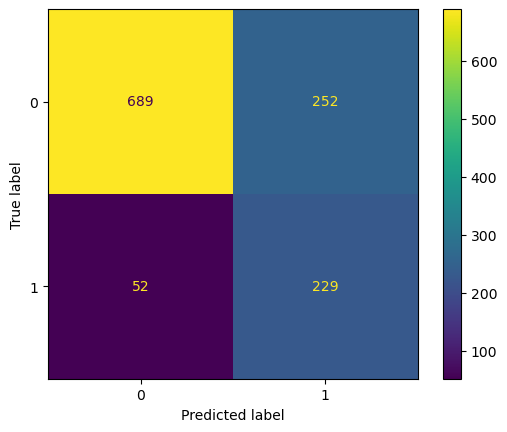

In [265]:
# Confusion Matrix -- ALL FEATURES
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

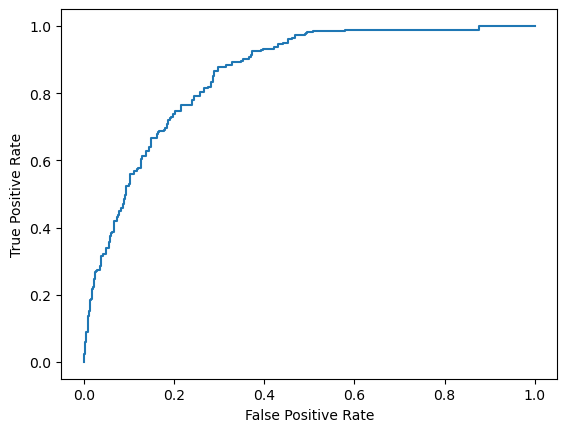

In [266]:
# ROC Curve Plotted -- NO LIFESTYLE FEATURES
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [267]:
# Train Decision Tree Classifier -- ALL FEATURES'
(X_train, X_test, y_train, y_test) = train_test_split(X_df, Y_df, test_size=0.20)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [268]:
# Decision Tree - Predict -- ALL FEATURES
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9607201309328969


In [269]:
# Decision Tree - AUC Score -- ALL FEATURES
y_pred_proba = dt.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

0.9742765273311896


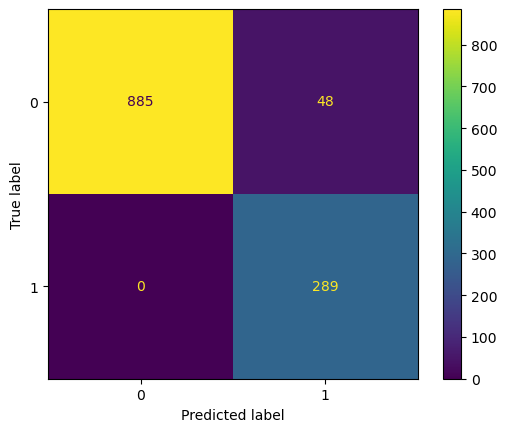

In [270]:
# Decision Tree - Confusion Matrix -- ALL FEATURES
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

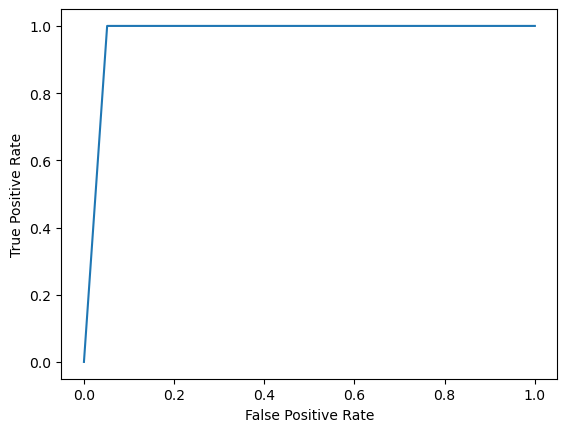

In [271]:
# Decision Tree - ROC Curve Plotted -- ALL FEATURES
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [272]:
# Make train_test_split - NO LIFESTYLE FEATURES
(X_train, X_test, y_train, y_test) = train_test_split(X_df_nl, Y_df_nl, test_size=0.20)


In [273]:
# Train Decision Tree Classifier -- NO LIFESTYLE FEATURES
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [274]:
# Predict -- NO LIFESTYLE FEATURES
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9492635024549918


In [275]:
# Decision Tree - AUC Score -- NO LIFESTYLE FEATURES
y_pred_proba = dt.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)


0.966986155484558


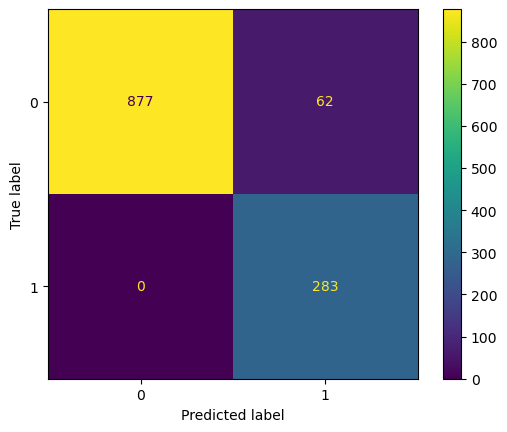

In [276]:
# Decision Tree - Confusion Matrix -- NO LIFESTYLE FEATURES
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

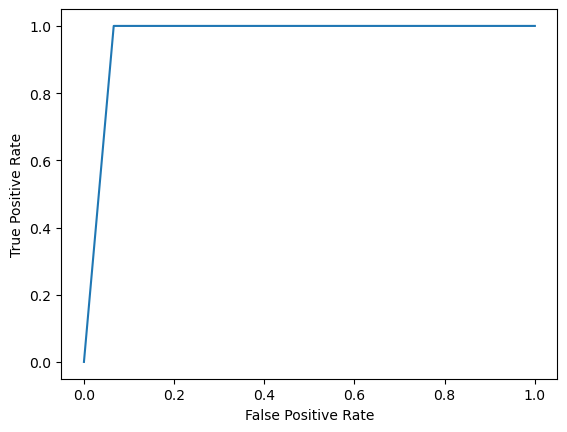

In [277]:
# Decision Tree - ROC Curve Plotted -- No Lifestyle Features
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [278]:
# Neural Network Load Data -- ALL FEATURES
(X_train, X_test, y_train, y_test) = train_test_split(X_df, Y_df, test_size=0.30)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)


In [279]:
# Convert data to torch tensors
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [280]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len


In [281]:
# Create Dataloader
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=True)

In [320]:
# Design Neural Network
input_dim = 21
hidden_dim = 18
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)


NeuralNetwork(
  (layer_1): Linear(in_features=21, out_features=18, bias=True)
  (layer_2): Linear(in_features=18, out_features=1, bias=True)
)


In [321]:
# Data Set is imbalanced so need to add weights for classes to loss function
# Positive Weight = 1 - (209/4909) = 0.9575
# Negative Weight = 1 - (4700/4909) = 0.0426
# class_weights = torch.tensor([0.10])

learning_rate = 0.1

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [322]:
# Train Model
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        # y.unsqueeze(-1)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training Complete


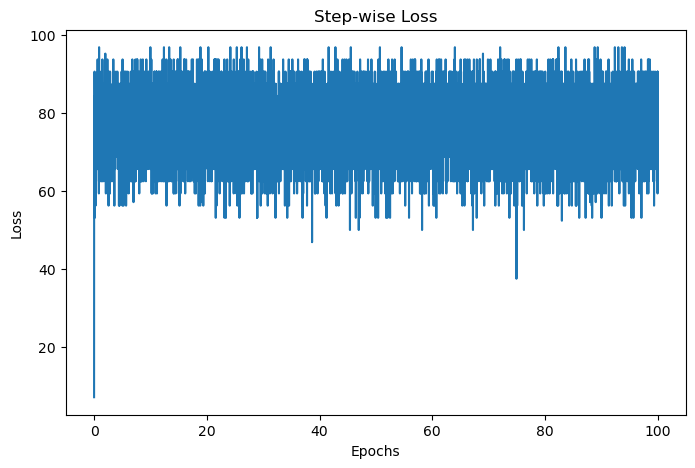

In [323]:
# Show Loss
step = np.linspace(0, 100, 13400)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [324]:
# Accuracy Calculation
y_pred = []
y_test = []
total = 0
correct = 0
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the 3300 test instances: {100 * correct // total}%')

Accuracy of the network on the 3300 test instances: 23%


In [325]:
# Classification Report
y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1405
         1.0       0.23      1.00      0.38       428

    accuracy                           0.23      1833
   macro avg       0.12      0.50      0.19      1833
weighted avg       0.05      0.23      0.09      1833



/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


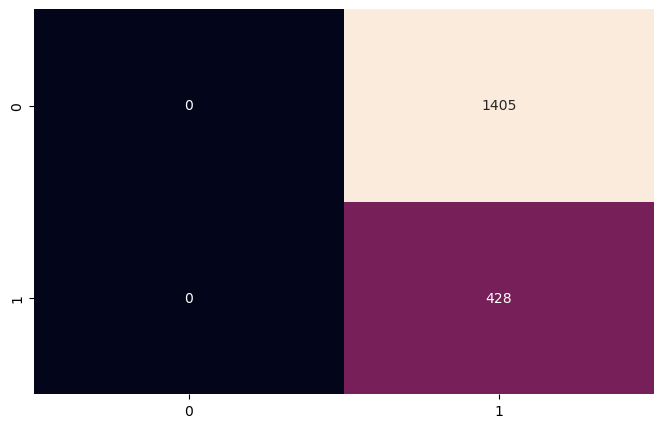

In [326]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()